In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
pwd()

'c:\\Users\\ajith\\Downloads\\projects\\realtime_volatility_for_options_using_GARCH_model\\notebooks'

In [31]:
df = pd.read_csv("../data/raw/NIFTY 500_daily_data.csv", parse_dates=['date'], index_col='date')



In [32]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

## Calculate log returns

In [33]:
df['log_return']=np.log(df['close']/df['close'].shift(1))
df.dropna(inplace=True)
print(df['log_return'].describe())

count    2504.000000
mean        0.000463
std         0.010408
min        -0.137063
25%        -0.004119
50%         0.001248
75%         0.005899
max         0.074094
Name: log_return, dtype: float64


In [34]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'log_return'], dtype='object')

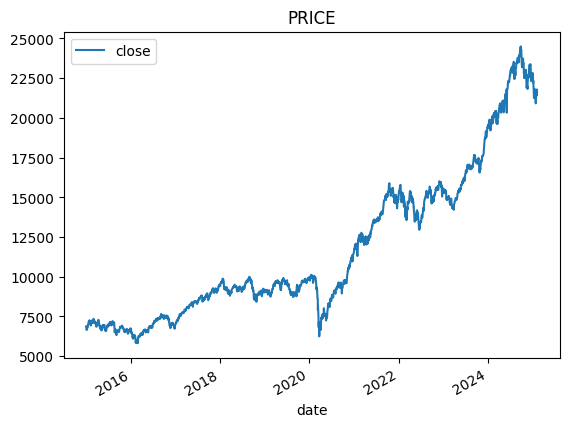

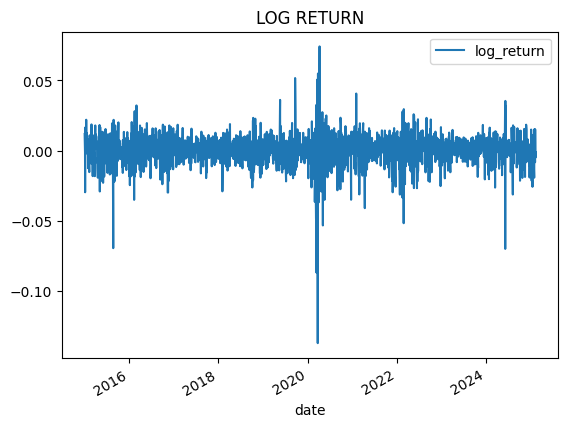

In [35]:
# plot 
df['close'].plot(title='PRICE')
plt.legend(['close'])
plt.show()
df['log_return'].plot(title='LOG RETURN')
plt.legend(['log_return'])
plt.show()

## rolling volatility

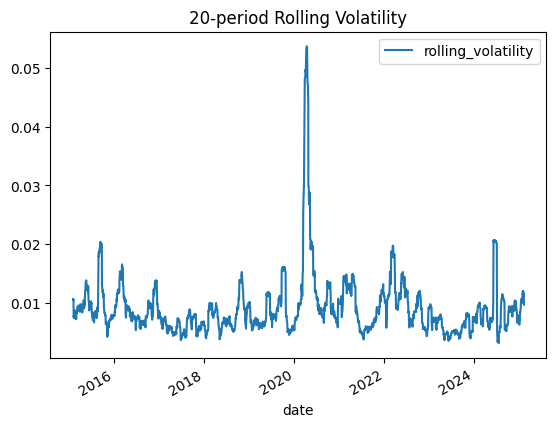

In [37]:
df['rolling_volatility'] = df['log_return'].rolling(window=20).std()
df['rolling_volatility'].plot(title='20-period Rolling Volatility')
plt.legend(['rolling_volatility'])

In [40]:
df.to_csv("../data/processed/NIFTY_500_daily.csv")

In [42]:

df = pd.read_csv("../data/raw/option-chain-ED-NIFTY-07-Aug-2025.csv", skiprows=1)

In [43]:
df.columns

Index(['Unnamed: 0', 'OI', 'CHNG IN OI', 'VOLUME', 'IV', 'LTP', 'CHNG',
       'BID QTY', 'BID', 'ASK', 'ASK QTY', 'STRIKE', 'BID QTY.1', 'BID.1',
       'ASK.1', 'ASK QTY.1', 'CHNG.1', 'LTP.1', 'IV.1', 'VOLUME.1',
       'CHNG IN OI.1', 'OI.1', 'Unnamed: 22'],
      dtype='object')

In [47]:
df.columns = [
    'CHNG_EMPTY1', 'OI', 'CHNG IN OI', 'VOLUME', 'IV', 'LTP', 'CHNG',
       'BID QTY', 'BID', 'ASK', 'ASK QTY', 'STRIKE', 'BID QTY.1', 'BID.1',
       'ASK.1', 'ASK QTY.1', 'CHNG.1', 'LTP.1', 'IV.1', 'VOLUME.1',
       'CHNG IN OI.1', 'OI.1', 'CHNG_EMPTY2'
]

In [52]:
df = df.dropna(subset=["STRIKE"])
numeric_cols = df.columns.drop(["STRIKE", "CHNG_EMPTY1", "CHNG_EMPTY2"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
selected_df = df[[
    "STRIKE",
    "IV", "LTP", "OI", "VOLUME",
    "IV.1", "LTP.1", "OI.1", "VOLUME.1"
]]



In [54]:
df.to_csv("../data/processed/option_chain_7thAug.csv")